# 선형 회귀 모델
- 키, 몸무게, 성별 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams.update({'font.size': 12})

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## 데이터
- 키, 몸무게, 성별 데이터

In [3]:
## 키, 몸무게, 성별 데이터 다운로드

df = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height500.csv")
print(df.shape)
df[:5]

(1000, 3)


,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


## 데이터 특성 보기

In [4]:
# 성별 분포 보기
print(df.Gender.value_counts())

Gender
Male      500
Female    500
Name: count, dtype: int64


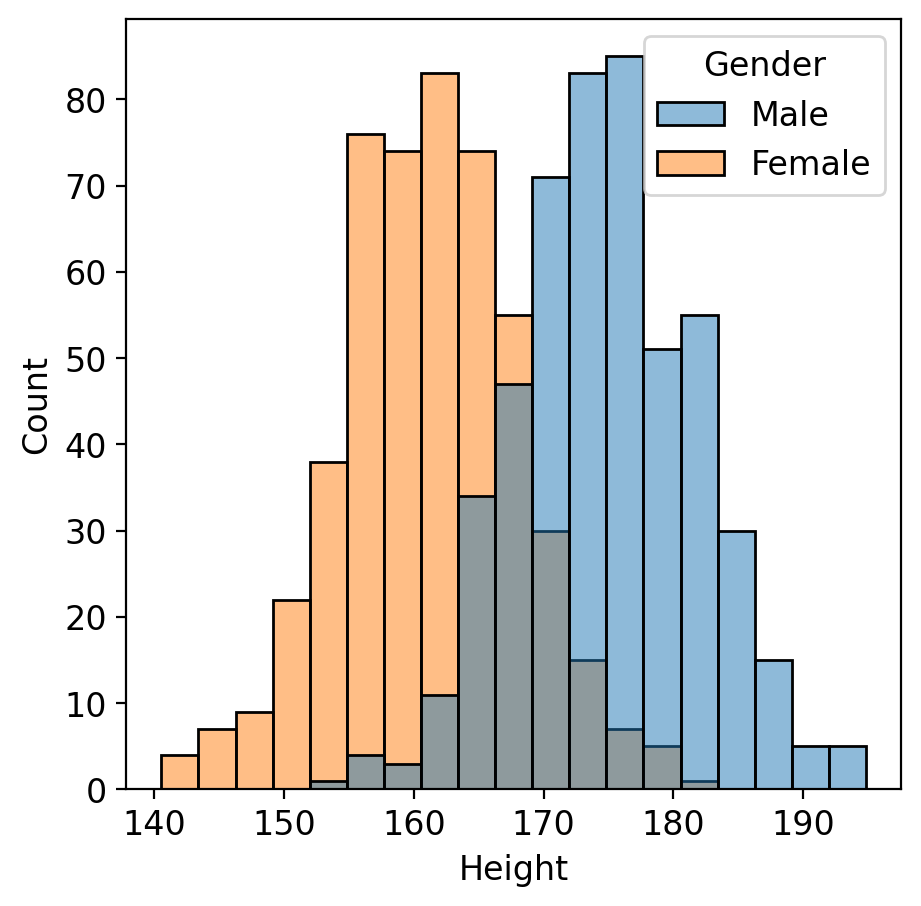

<Axes: xlabel='Weight', ylabel='Count'>

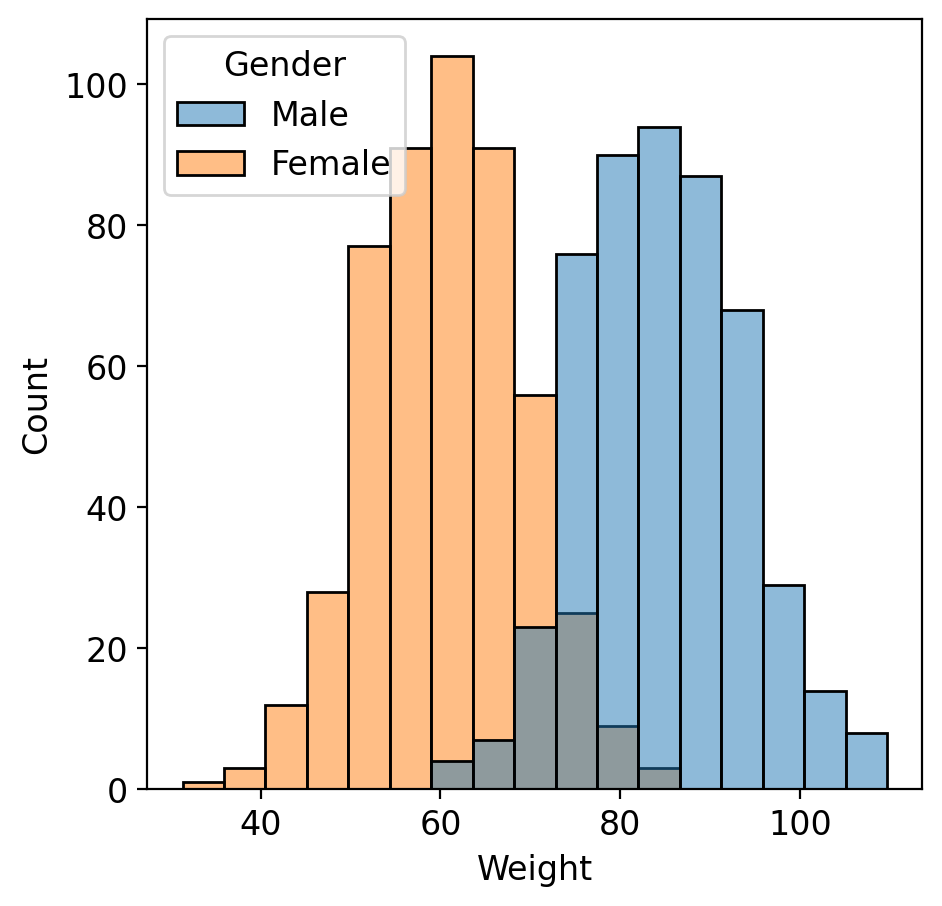

In [5]:
## 남여별 키와 몸무게 분포 보기

import seaborn as sns
sns.histplot(data=df, x='Height',hue='Gender')
plt.show()
sns.histplot(data=df, x='Weight',hue='Gender')

<Axes: xlabel='Height', ylabel='Weight'>

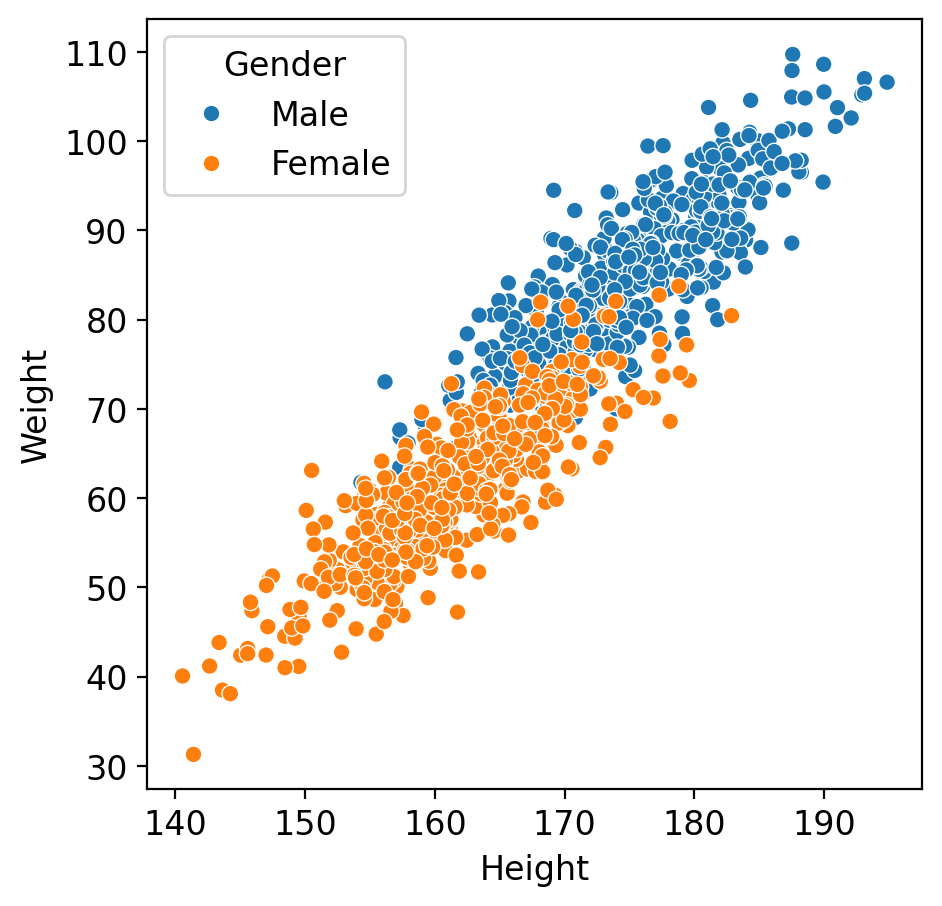

In [6]:
## 남여별 키와 몸무게 산포도

sns.scatterplot(data=df, x='Height', y='Weight',
                hue='Gender')

# 모델 선택, 학습, 사용

- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

## 훈련 및 검증 데이터 나누기

- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

## 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [7]:
df.Gender = df.Gender.map({'Male':0, 'Female':1})
df[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [8]:
## 키로부터 몸무게 예측하는 선형 모델

# X에 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다
X = df[['Height']]
y = df['Weight']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # (1) 모델 생성
model.fit(X_train, y_train) # (2) 학습
model.score(X_test, y_test) # (3) 성능 평가

0.868414314852062

## 모델 가중치 보기

- $\hat{y} = ax + b $
- $x$: 키

In [9]:
# 모델 가중치(파라미터) 보기

a, b = model.coef_, model.intercept_
print('a=',a, ', b=',b)

a= [1.41396862] , b= -164.77796898206793


## 선형 회귀 직선 그리기

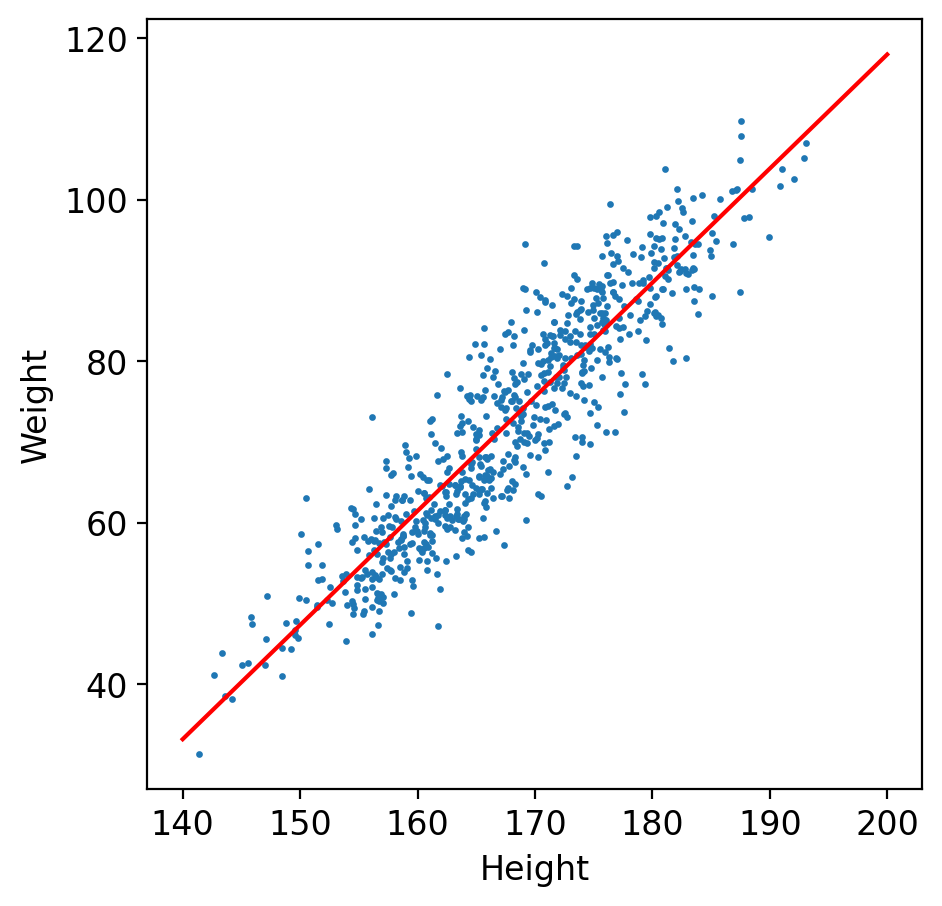

In [10]:
# 회귀 직선 보기 (양 끝점 두개를 연결)
xs = np.linspace(140,200,2) # 키의 양 끝점 선택
ys = a*xs + b               # 모델이 예측하는 키-몸무게 관계
plt.plot(xs,ys, c='r')      # 회귀직선

# 훈련 데이터의 산포도
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(X_train.values, y_train, s=2)

## 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치

-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [11]:
## 회귀모델의 여러가지 성능 평가 지표

def show_reg_result(y_test,y_pred):
    print("R-Squared: ",
      np.round(r2_score(y_test, y_pred), 3))
    print("Max Error: ",
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ",
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ",
      round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))

# 예측값을 구한 후에 여러 성능 보기
y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

R-Squared:  0.868
Max Error:  18.48
Mean Absolute Error:  4.486
Root Mean Squared Error:  5.659


In [12]:
## 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values # 인덱스가 있는 경우 삭제한다
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.show()

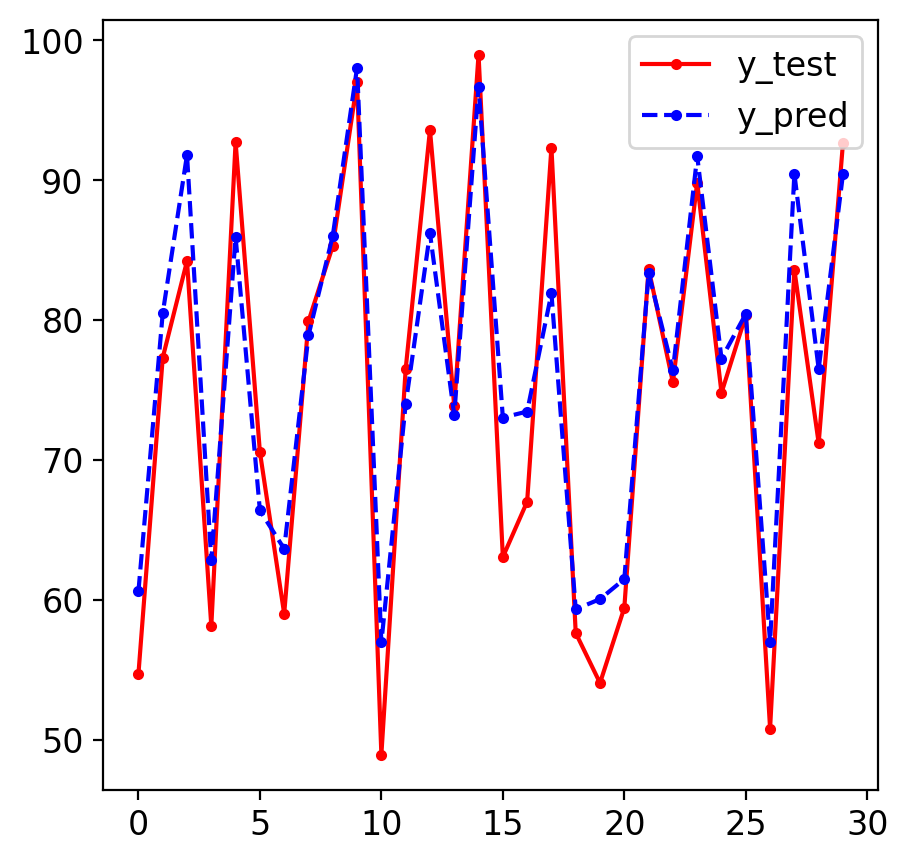

In [13]:
plot_reg_result(y_test, y_pred, 30)

## 모델 사용
- 임의의 키 값에 대한 몸무게 예측 수행

In [14]:
X_sample = pd.DataFrame({'Height': np.array((160, 170, 180))})
print(X_sample)
model.predict(X_sample)

   Height
0     160
1     170
2     180


array([61.45701078, 75.59669701, 89.73638325])

# 성별 정보 사용

- 성별과 키, 두개의 컬럼 사용
- 추가정보를 사용함으로써 성능이 개선되는지 확인

In [15]:
# 데이터프레임 내에서 소수점 자리수 고정하기
# pd.set_option('display.float_format', '{:.3f}'.format)

In [16]:
## 입력으로 성별과 키 두개의 컬럼을 사용

X = df[["Gender", "Height"]]
y = df.Weight

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8962291075400209

- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 모델 가중치 보기
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = a_{1}x_{1} + a_{2}x_{2} + b $
- $x_{1}$: 성별, $x_{2}$: 키

In [17]:
print(model.coef_)
print(model.intercept_)

[-9.735297    1.04730942]
-98.44363999238854


## 회귀 직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

a1, a2, b1 = [  -9.735    1.047 -164.778]


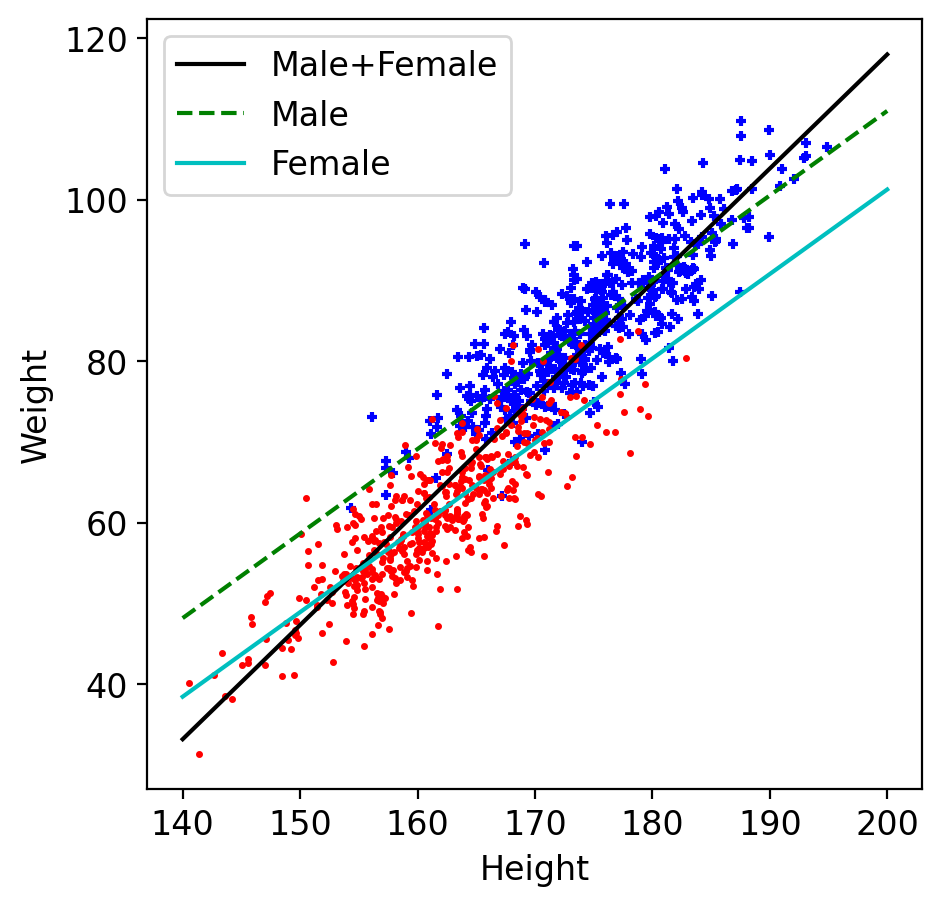

In [18]:
## 선형 회귀 직선 그리기 (성별을 추가한 경우)

# 학습된 가중치(파라미터) 보기
a1, a2 = model.coef_[0], model.coef_[1]
b1 = model.intercept_
print('a1, a2, b1 =',np.array((a1, a2, b)).round(3))

# 훈련 데이터의 산포도 보기
plt.scatter(df.Height[df.Gender==0],df.Weight[df.Gender==0],
            marker='+', s=13, color='b')
plt.scatter(df.Height[df.Gender==1],df.Weight[df.Gender==1],
            marker='.', s=9, color='r')
plt.xlabel('Height')
plt.ylabel('Weight')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
xs = np.linspace(140,200,2)  # 양 끝점
ys = a*xs + b
plt.plot(xs, ys, c='k', label='Male+Female') # 검정색

# 남성의 경우 회귀 직선 (Gender=0 으로 고정)
ys = a1*0 + a2*xs + b1
plt.plot(xs, ys, 'g--', label='Male')      # 초록색

# 여성의 경우 회귀 직선 (Gender=1 로 고정)
ys = a1*1 + a2*xs + b1
plt.plot(xs, ys, c='c', label='Female')     # 싸이언색
plt.legend()

# (실습) 회귀 직선을 산포도와 같이 그리기
- 남여 성별을 사용하지 않는 경우에, 예제에서는 회귀 직선을 훈련 데이터 산포도와 함께 그렸다. 회귀 직선을 테스트 데이터의 산포도와 함께 그려보시오
- 회귀 직선과 훈련 데이터 산포도를 함께 그린 그래프와, 회귀 직선과 테스트 데이터 산포도를 함께 그린 두 그래프의 차이는 무엇인지 설명하시오

# (실습) 성별 인코딩 변경
- 남성을 1로, 여성을 0으로 인코딩한 경우 성능이 달라지는지 확인하시오
- 성별을 원핫인코딩 하는 경우 성능이 달라지는지 확인하시오
  - get_dummies() 사용